CSVファイルを読み込みました。Shape: (6400, 187)
'wave_1025.91nm' から 'wave_1238.24nm' までを抽出しました。
ピクセル数: 6400, 使用バンド数: 18, 画像サイズ: 80x80
PCAを実行しました。結果のShape: (6400, 18)
PCAの結果を画像スタックに再構成しました。
全PC画像をプロットします。異常のあるPC番号（1から始まる）を確認してください。


C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\1637891067.py:84: UserWarning: Glyph 23492 (\N{CJK UNIFIED IDEOGRAPH-5BC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.98])
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\1637891067.py:84: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.98])
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\1637891067.py:84: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.98])
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\1637891067.py:84: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.98])
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\1637891067.py:84: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.9

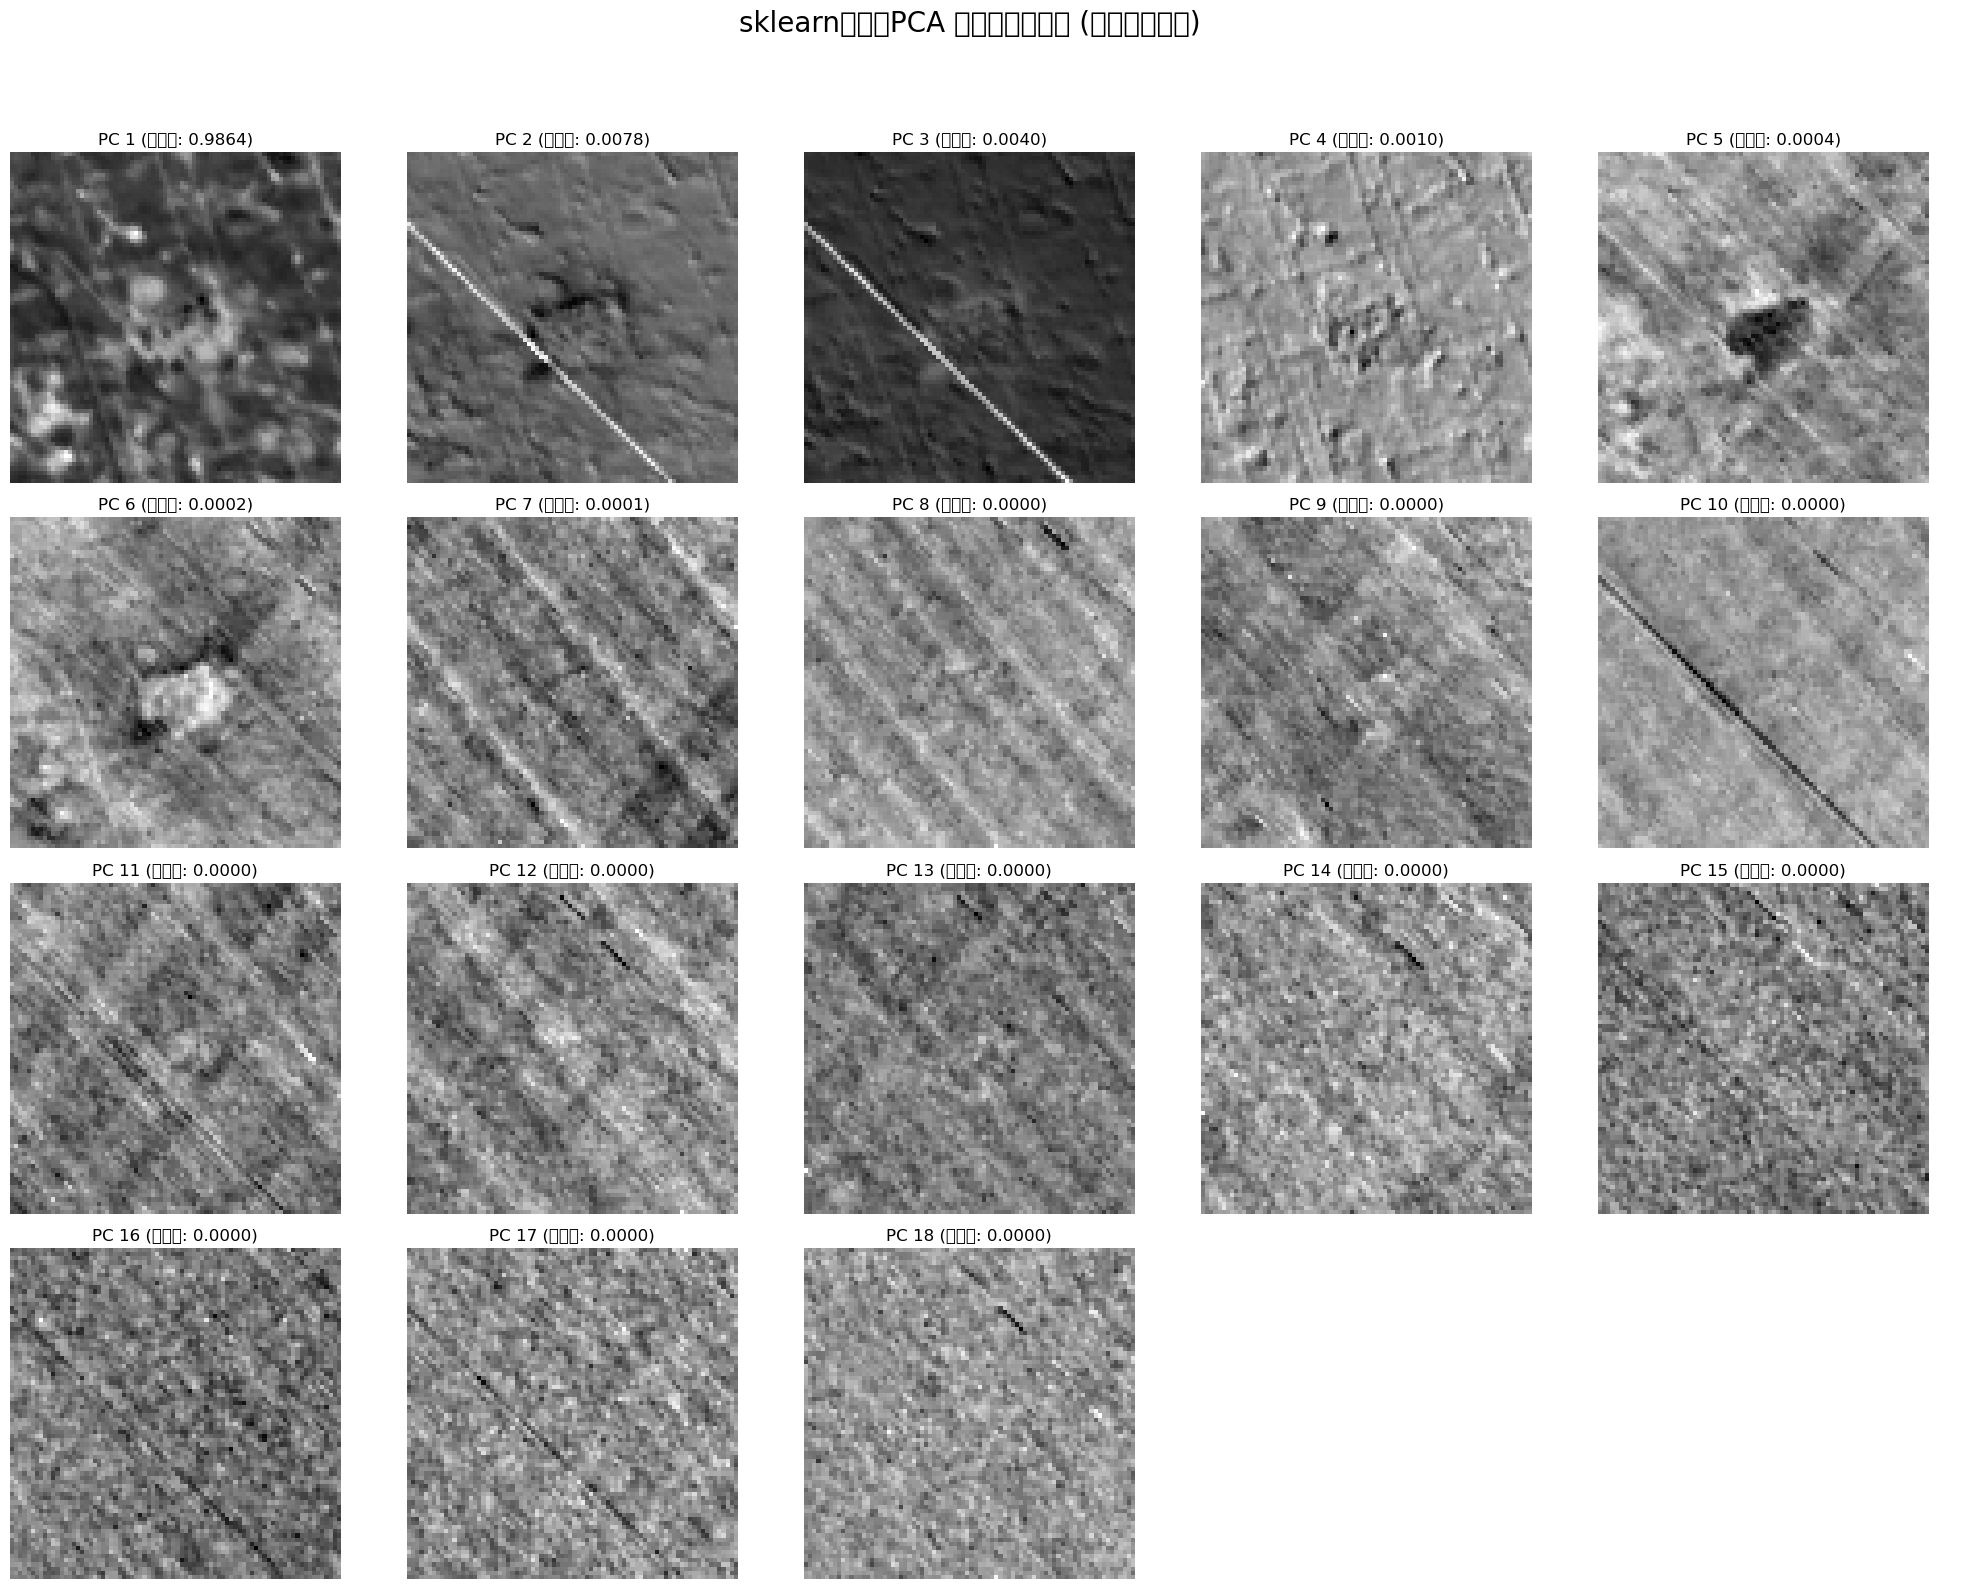

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import cv2 # OpenCV

# --- ステップ1: データの読み込みと準備 ---
file_path = r"E:\refit\all_roi_spectra.csv"
try:
    df = pd.read_csv(file_path)
    print(f"CSVファイルを読み込みました。Shape: {df.shape}")
except FileNotFoundError:
    print(f"エラー: ファイルが見つかりません: {file_path}")
    raise

# 座標データを取得
y_coords = df.iloc[:, 0].values.astype(int)
x_coords = df.iloc[:, 1].values.astype(int)

# ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
# (要設定) 使用する波長の開始列名と終了列名を指定してください
start_band_name = 'wave_1025.91nm' # <-- ご自身のデータに合わせて変更
end_band_name   = 'wave_1238.24nm' # <-- ご自身のデータに合わせて変更
# ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

# 1.3. 該当する列（バンド）を抽出
try:
    all_columns = df.columns.tolist()
    start_index = all_columns.index(start_band_name)
    end_index = all_columns.index(end_band_name)
    
    # 指定された波長範囲のスペクトルデータだけを抽出
    spectral_data = df.iloc[:, start_index : end_index + 1].values
    
    n_pixels, n_bands = spectral_data.shape
    H = y_coords.max() + 1
    W = x_coords.max() + 1
    
    print(f"'{start_band_name}' から '{end_band_name}' までを抽出しました。")
    print(f"ピクセル数: {n_pixels}, 使用バンド数: {n_bands}, 画像サイズ: {H}x{W}")

except ValueError as e:
    print(f"エラー: 指定されたバンド名が見つかりません。 {e}")
    # このセル以降の実行を停止
    raise

# --- ステップ2: 標準化 (sklearn) ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spectral_data)

# --- ステップ3: PCAの実行 (sklearn) ---
# 全ての主成分を計算 (n_components = 使用バンド数)
pca = PCA(n_components=n_bands)
pca_results_sklearn = pca.fit_transform(scaled_data)

print(f"PCAを実行しました。結果のShape: {pca_results_sklearn.shape}")

# --- ステップ4: 画像形式に戻す ---
# この変数は、次の「ハフ変換」のセルでも使います
pca_image_stack = np.full((H, W, n_bands), np.nan)
pca_image_stack[y_coords, x_coords] = pca_results_sklearn

print("PCAの結果を画像スタックに再構成しました。")

# --- ステップ5: 全主成分画像の可視化 ---
print("全PC画像をプロットします。異常のあるPC番号（1から始まる）を確認してください。")

ncols = 5
nrows = int(np.ceil(n_bands / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 4))
fig.suptitle('sklearnによるPCA 主成分の可視化 (波長範囲指定)', fontsize=20, y=1.02)

for i in range(n_bands):
    ax = axes.flat[i]
    img_data = pca_image_stack[:, :, i]
    ax.imshow(img_data, cmap='gray')
    ax.set_title(f'PC {i+1} (寄与率: {pca.explained_variance_ratio_[i]:.4f})')
    ax.axis('off')

for i in range(n_bands, len(axes.flat)):
    axes.flat[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

しきい値 200 で二値化しました。
細線化処理 (Thinning) を実行しました。
1 本の候補線を検出しました。
角度フィルタリング後、 1 本の線を描画します。


C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\681702052.py:117: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\681702052.py:117: UserWarning: Glyph 35937 (\N{CJK UNIFIED IDEOGRAPH-8C61}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\681702052.py:117: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\681702052.py:117: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\681702052.py:117: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\681702052.py:117: UserWarning: Glyph 32048 (\N{CJK UN

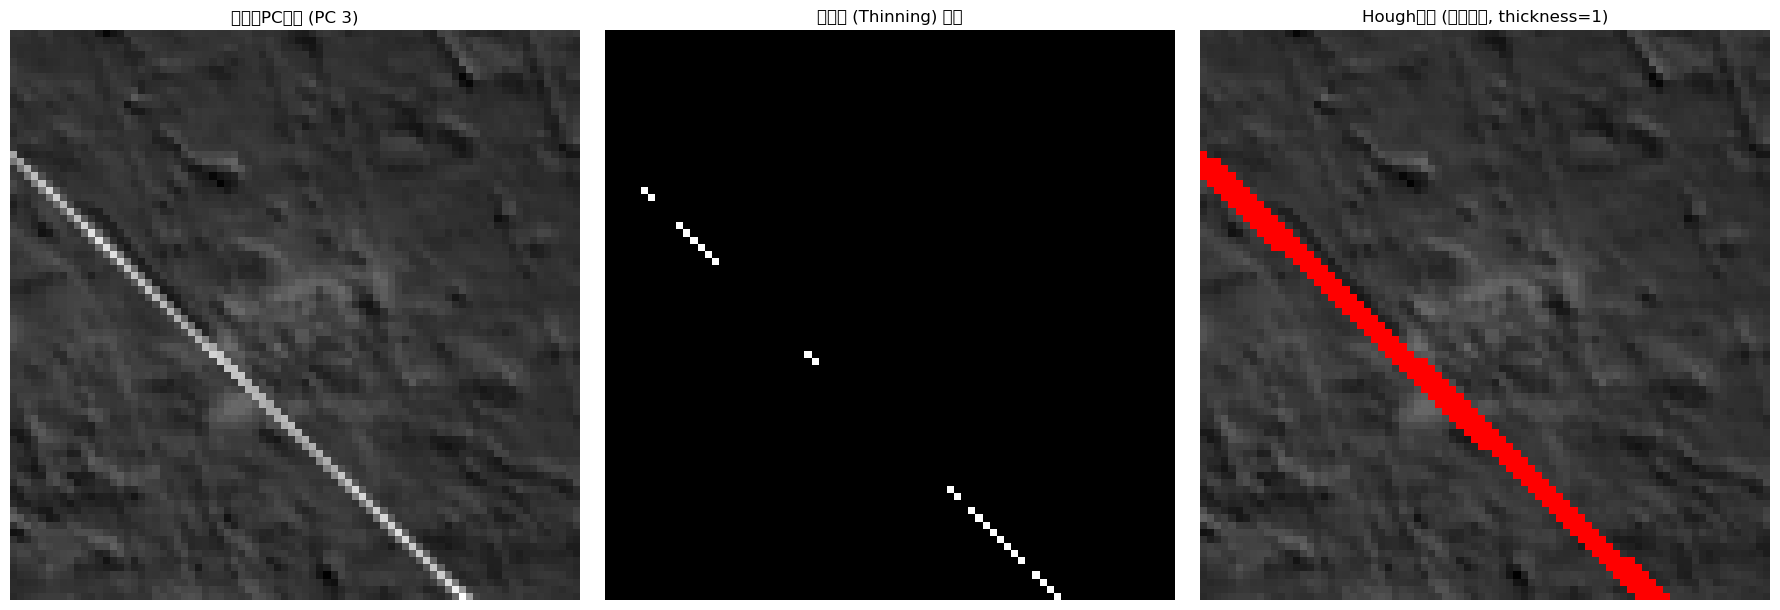


--- パラメータ調整のヒント (新) ---
 1. 「細線化結果」の図がスジをうまく捉えていない場合: `binary_threshold_value` (200) を調整してください。
 2. 線が検出されない/多すぎる場合: `hough_threshold_thin` (20) を調整してください。


In [58]:
# ... (ステップ6: pc_image_raw, pc_image_filled, scaled_image の準備まで) ...

# --- ステップ7: 二値化 (Binarization) ---
# Cannyの代わりに、しきい値処理で明るいスジを抽出します

# ★★★ (要調整) ★★★
# 明るいスジを抽出するための「しきい値」
# 0-255 のスケーリング画像 (scaled_image) に対して設定
# スジが非常に明るい場合は 200 や 220、そうでもない場合は 150 などに調整
binary_threshold_value = 200 
# ★★★★★★★★★★★★★★★★★

# しきい値より明るいピクセルを「白」(255)に、それ以外を「黒」(0)にする
ret, binary_image = cv2.threshold(scaled_image, 
                                  binary_threshold_value, 
                                  255, 
                                  cv2.THRESH_BINARY)

print(f"しきい値 {binary_threshold_value} で二値化しました。")

# --- ステップ8: 細線化 (Thinning) ---
# 3ピクセル幅の「太い」スジを、1ピクセル幅の「中心線」に変換
# この処理には ximgproc モジュールが必要です
try:
    # cv2.ximgproc.thinning を使って中心線（スケルトン）を計算
    thin_image = cv2.ximgproc.thinning(binary_image, 
                                     thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
    print("細線化処理 (Thinning) を実行しました。")
    
except AttributeError as e:
    print("\n--- エラー ---")
    print(f"cv2.ximgproc.thinning が見つかりません。 {e}")
    print("OpenCVの拡張モジュールが必要です。")
    print("Jupyterのセルで `!pip install opencv-contrib-python` を実行し、")
    print("カーネルを再起動してから、もう一度試してください。")
    print("---------------\n")
    # 代替として、二値画像をそのままHoughに回すが、結果はずれる
    # thin_image = binary_image 
    raise # エラーで停止

# --- ステップ9: ハフ変換 (HoughLines) ---
# Cannyエッジ画像ではなく、「細線化された画像」に対してHoughを実行

# ★★★ (要調整) ★★★
# Cannyの時とは投票数が変わるため、しきい値の調整が必要
# 以前の 70 よりも小さい値 (例: 30, 50) から試してください
hough_threshold_thin = 20 
# ★★★★★★★★★★★★★★★

lines = cv2.HoughLines(
    thin_image,     # <-- ここを変更
    rho=1, 
    theta=np.pi / 180, 
    threshold=hough_threshold_thin 
)

# --- ステップ10: 角度フィルタリングと描画 ---
# (このステップは、以前のコードと全く同じです)

line_image = cv2.cvtColor(scaled_image, cv2.COLOR_GRAY2BGR)

if lines is not None:
    print(f"{len(lines)} 本の候補線を検出しました。")
    
    # 角度フィルタリング
    angle_target_rad = np.pi * 3 / 4  # 135°
    angle_tolerance_rad = np.deg2rad(10) # 許容誤差 ±10°
    
    min_theta = angle_target_rad - angle_tolerance_rad
    max_theta = angle_target_rad + angle_tolerance_rad
    
    filtered_lines = []
    for line in lines:
        rho, theta = line[0]
        if theta >= min_theta and theta <= max_theta:
            filtered_lines.append(line)
            
    print(f"角度フィルタリング後、 {len(filtered_lines)} 本の線を描画します。")
    
    # 描画 (太さ=1 で中心を確認)
    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        
        x1 = int(x0 + 1000 * (-b)) 
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        # 太さを1に設定
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2) 
        
else:
    print("直線は検出されませんでした。HoughLinesの `threshold` を調整してください。")

# --- プロット ---
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(scaled_image, cmap='gray')
plt.title(f'対象のPC画像 (PC {ERROR_PC_INDEX + 1})')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thin_image, cmap='gray')
plt.title('細線化 (Thinning) 結果') # Cannyから変更
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough変換 (細線化後, thickness=1)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n--- パラメータ調整のヒント (新) ---")
print(f" 1. 「細線化結果」の図がスジをうまく捉えていない場合: `binary_threshold_value` ({binary_threshold_value}) を調整してください。")
print(f" 2. 線が検出されない/多すぎる場合: `hough_threshold_thin` ({hough_threshold_thin}) を調整してください。")

PC 3 の画像を 0-255 (uint8) にスケーリングしました。
Cannyエッジ検出を実行しました。
直線は検出されませんでした。CannyやHoughLinesの `threshold` を調整してください。


C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\3887328276.py:115: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\3887328276.py:115: UserWarning: Glyph 35937 (\N{CJK UNIFIED IDEOGRAPH-8C61}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\3887328276.py:115: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\3887328276.py:115: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\3887328276.py:115: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\yudon\AppData\Local\Temp\ipykernel_23196\3887328276.py:115: UserWarning: Glyph 12456 (\N{

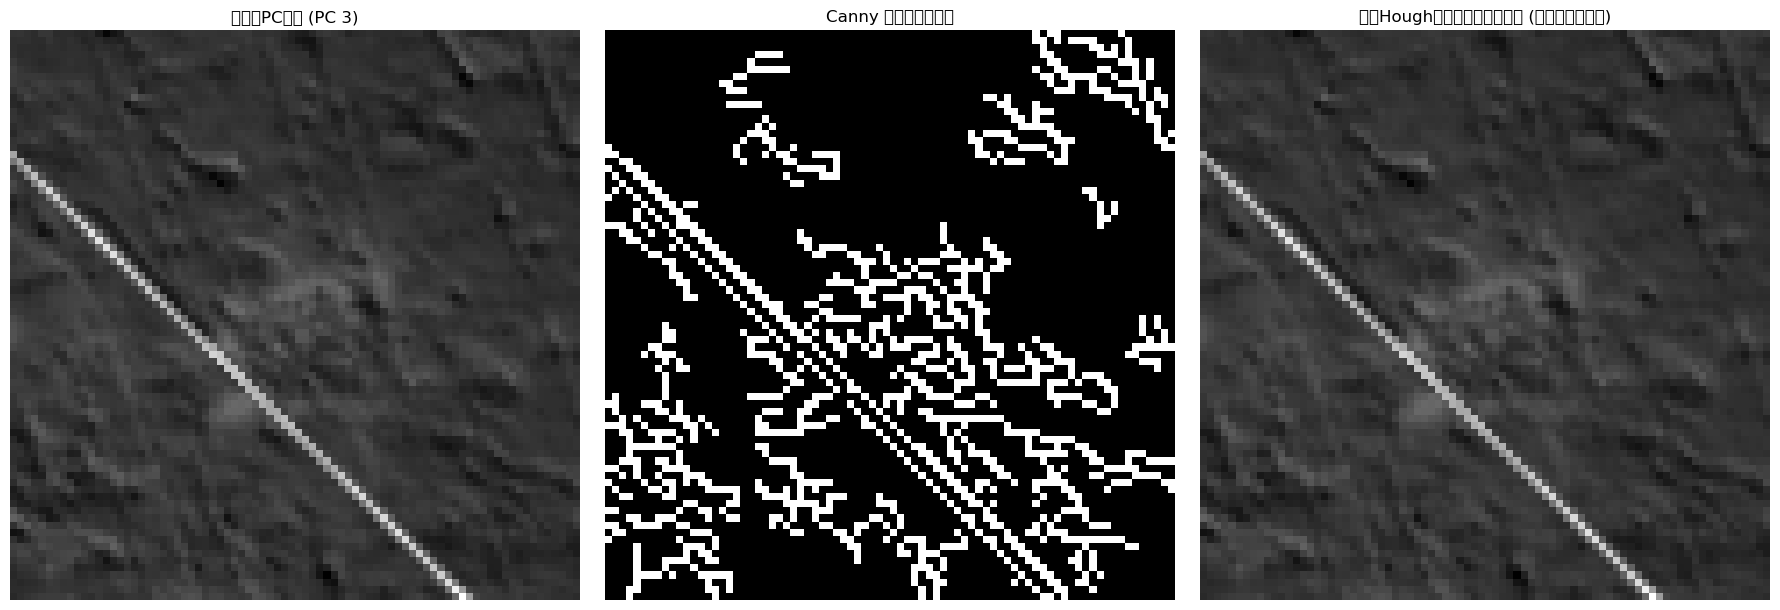


--- パラメータ調整のヒント (HoughLines) ---
 * 検出された線が多すぎる/少なすぎる場合: `cv2.HoughLines` の `threshold` (100で設定) を増減させてください。
 * 角度が違う場合: `angle_target_rad` の値 (現在 2.36 rad) を調整してください。
   (もし / (左肩上がり) の場合は `np.pi * 3 / 4` (135°) 付近を試してください)


In [53]:
# --- ステップ6: 異常PCの特定とハフ変換の準備 ---

# ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
# (要設定) 上のプロットを見て、異常なスジが見えるPC番号を指定してください
# (例: PC 11 に見えた場合、 11 - 1 = 10 を設定)
ERROR_PC_INDEX = 2
# ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

# 該当するPC画像を取得
pc_image_raw = pca_image_stack[:, :, ERROR_PC_INDEX]

# NaN（データ範囲外）を処理 (例: 0で埋める)
pc_image_filled = np.nan_to_num(pc_image_raw, nan=0.0)

# ハフ変換のために、画像を 0-255 の整数 (uint8) にスケーリング
# cv2.normalize を使い、最小値を0、最大値を255にします
scaled_image = cv2.normalize(pc_image_filled, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

print(f"PC {ERROR_PC_INDEX + 1} の画像を 0-255 (uint8) にスケーリングしました。")

# --- ステップ7: エッジ検出 (Canny) ---
# ハフ変換はエッジ画像に対して最も効果的に機能します
# Cannyのしきい値は画像のコントラストによって調整が必要です
edges = cv2.Canny(scaled_image, threshold1=50, threshold2=200)

print("Cannyエッジ検出を実行しました。")

# --- ステップ8: ハフ変換による直線検出 (HoughLinesP) ---
# 確率的ハフ変換 (HoughLinesP) を使用します
# ... (ステップ7: Cannyエッジ検出 の `edges` を作成した後) ...

# --- ステップ8: 標準ハフ変換による直線検出 (HoughLines) ---

# HoughLinesP の代わりに HoughLines を使用
# threshold: 直線とみなす投票数。Pより大きい値が必要なことが多い
lines = cv2.HoughLines(
    edges, 
    rho=1, 
    theta=np.pi / 180, 
    threshold=100  # <-- 調整が必要 (100〜200程度で試す)
)

# --- ステップ9: 角度によるフィルタリングと描画の準備 ---

# 描画用のカラー画像
line_image = cv2.cvtColor(scaled_image, cv2.COLOR_GRAY2BGR)

if lines is not None:
    print(f"{len(lines)} 本の候補線を検出しました。")
    
    # ★★★★★★★ 角度フィルタリング ★★★★★★★
    # 「左上方向」の角度(theta)をここで指定します
    # theta=0 -> 垂直線
    # theta=pi/2 (90°) -> 水平線
    #
    # "左上方向" が \ (右肩下がり) の場合: theta は 45° (pi/4) 付近
    # "左上方向" が / (左肩上がり) の場合: theta は 135° (3*pi/4) 付近
    #
    # ここでは「45° ± 5°」 (つまり pi/4 付近) を例とします
    angle_target_rad = 3*np.pi / 4  # 45°
    angle_tolerance_rad = np.deg2rad(10) # 許容誤差 ±5°
    
    min_theta = angle_target_rad - angle_tolerance_rad
    max_theta = angle_target_rad + angle_tolerance_rad
    
    filtered_lines = []
    for line in lines:
        rho, theta = line[0]
        if theta >= min_theta and theta <= max_theta:
            filtered_lines.append(line)
            
    print(f"角度フィルタリング後、 {len(filtered_lines)} 本の線を描画します。")
    
    # --- ステップ10: 検出結果の可視化 (標準ハフ変換) ---
    
    for line in filtered_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        
        # ここで、線の端点を画像の外側まで大きく計算します
        # これにより、線が画像全体を横切るようになります
        x1 = int(x0 + 1000 * (-b)) # 1000は十分大きな値
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        # 赤色 (BGR) で線を描画
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 1)
        
else:
    print("直線は検出されませんでした。CannyやHoughLinesの `threshold` を調整してください。")


# --- プロット (HoughLinesP版と同じ) ---
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(scaled_image, cmap='gray')
plt.title(f'対象のPC画像 (PC {ERROR_PC_INDEX + 1})')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny エッジ検出結果')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('標準Hough変換による直線検出 (角度フィルタ後)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n--- パラメータ調整のヒント (HoughLines) ---")
print(f" * 検出された線が多すぎる/少なすぎる場合: `cv2.HoughLines` の `threshold` ({100}で設定) を増減させてください。")
print(f" * 角度が違う場合: `angle_target_rad` の値 (現在 {angle_target_rad:.2f} rad) を調整してください。")
print(f"   (もし / (左肩上がり) の場合は `np.pi * 3 / 4` (135°) 付近を試してください)")
# 


Selected band columns for PCA:

Explained variance ratio for first 5 PCs:
[9.86390518e-01 7.84344304e-03 4.01381058e-03 9.81944969e-04
 3.72850978e-04 1.62437684e-04 8.59162884e-05 4.93911080e-05
 2.90489127e-05 1.81678090e-05 1.25306653e-05 1.01070207e-05
 8.01623834e-06 5.55322410e-06]

Detected image size: 80 (rows) x 80 (cols)
Row coordinate column: y, Col coordinate column: x


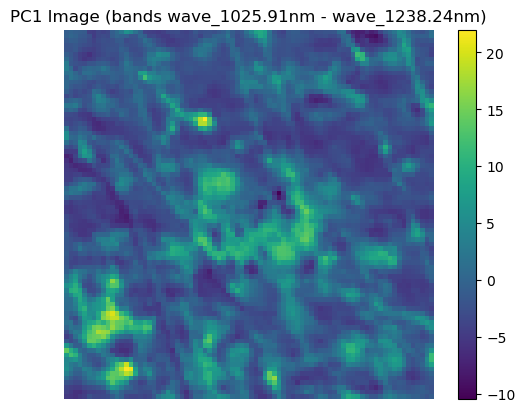

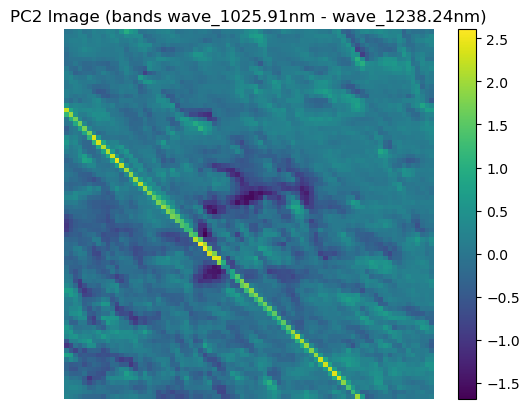

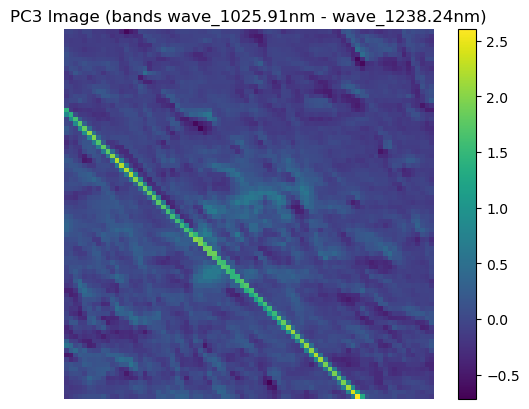

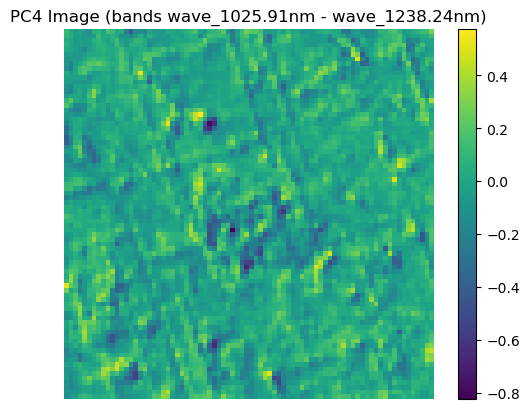

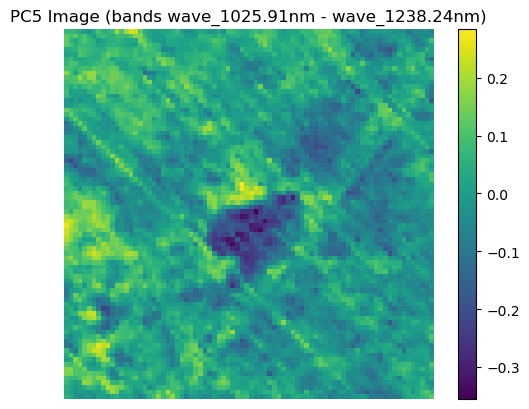

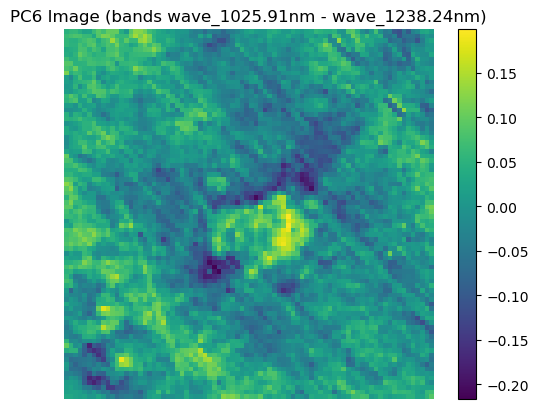

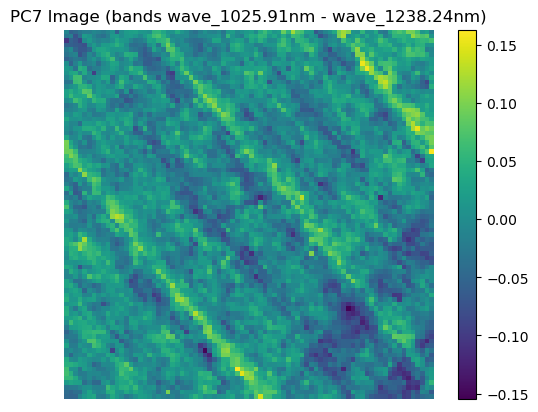

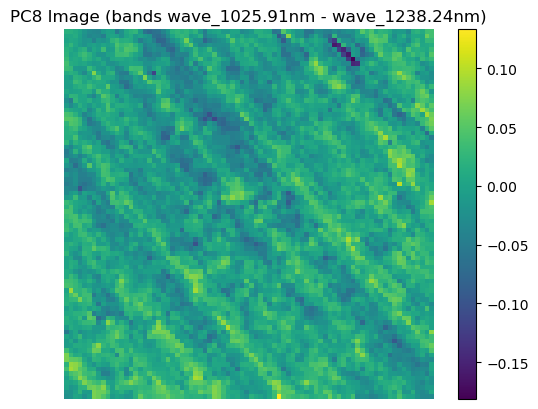

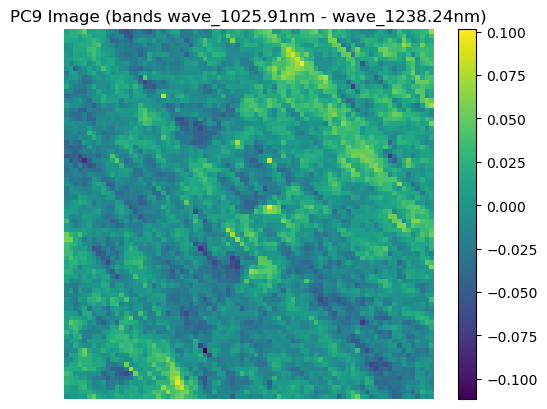

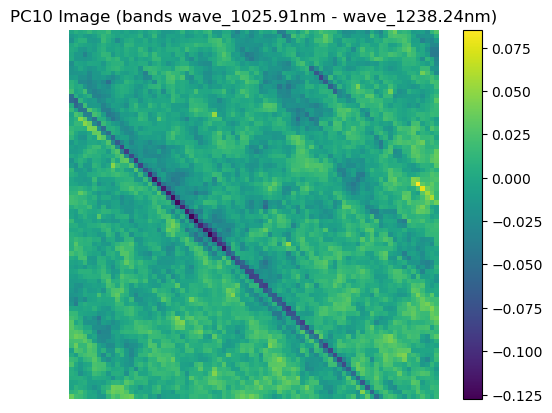

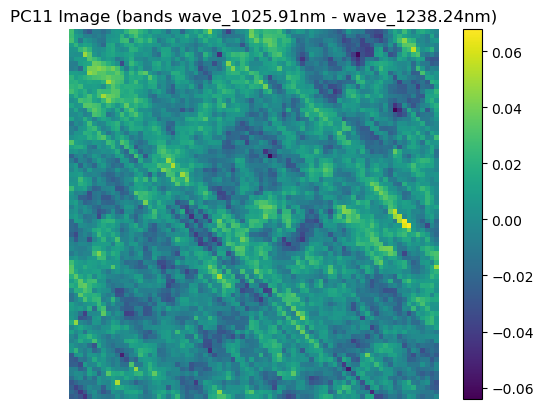

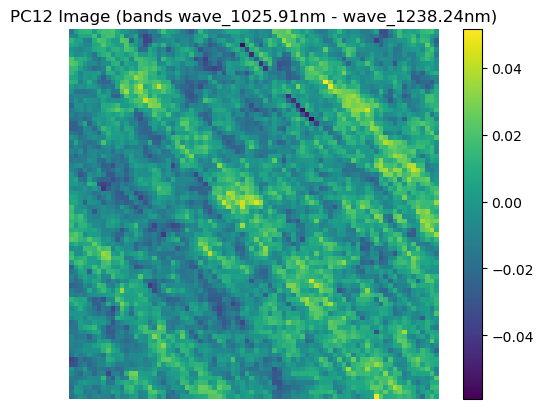

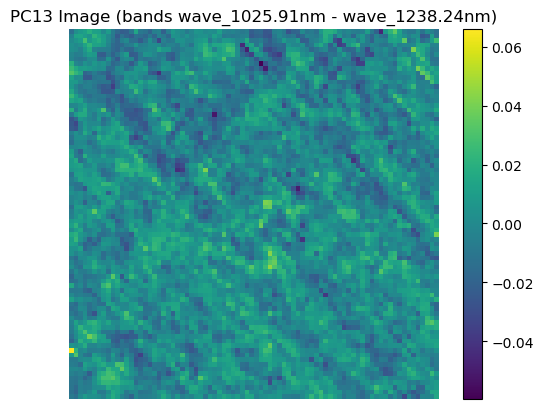

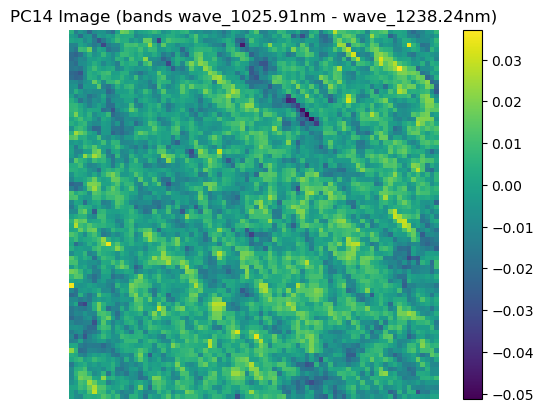

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Load data
csv_path = r"E:\refit\all_roi_spectra.csv"
df = pd.read_csv(csv_path)


# 2. Select spectral bands between start_band_name and end_band_name
start_band_name = "wave_1025.91nm"
end_band_name = "wave_1238.24nm"
cols = df.columns
try:
    start_idx = cols.get_loc(start_band_name)
    end_idx = cols.get_loc(end_band_name)
except KeyError as e:
    raise KeyError(f"Band name not found in columns: {e}")

band_cols = cols[start_idx:end_idx + 1]
print("\nSelected band columns for PCA:")


spectra = df[band_cols].to_numpy(dtype=float)

# 3. Handle NaNs: create a valid mask and fill NaNs with band means for PCA calculation
nan_mask = np.isnan(spectra).any(axis=1)
valid_mask = ~nan_mask

spectra_valid = spectra[valid_mask]

# Fill remaining NaNs (if any) with column means
col_means = np.nanmean(spectra_valid, axis=0)
inds = np.where(np.isnan(spectra_valid))
spectra_valid[inds] = np.take(col_means, inds[1])

# 4. Standardize and run PCA
scaler = StandardScaler()
spectra_scaled = scaler.fit_transform(spectra_valid)

n_components = 14
pca = PCA(n_components=n_components)
scores = pca.fit_transform(spectra_scaled)

print("\nExplained variance ratio for first 5 PCs:")
print(pca.explained_variance_ratio_)

# 5. Map PCA scores back to all pixels (rows), keeping invalid rows as NaN
pc_vectors = {}
for i in range(n_components):
    pc_full = np.full((len(df),), np.nan)
    pc_full[valid_mask] = scores[:, i]
    pc_vectors[i + 1] = pc_full  # PC index starting at 1 for readability

# 6. Guess coordinate columns and reshape to 2D images
coord_candidates_row = ["row", "Row", "ROW", "line", "Line", "LINE", "y", "Y"]
coord_candidates_col = ["col", "Col", "COL", "sample", "Sample", "x", "X"]

row_col_name = None
col_col_name = None

for c in coord_candidates_row:
    if c in df.columns:
        row_col_name = c
        break

for c in coord_candidates_col:
    if c in df.columns:
        col_col_name = c
        break

if row_col_name is None or col_col_name is None:
    print("\nCould not automatically detect row/col coordinate column names.")
    print("Available columns:", df.columns.tolist())
    raise ValueError("Row/column coordinate names not found. Please check the CSV structure.")

rows = df[row_col_name].values
cols_idx = df[col_col_name].values

unique_rows = np.unique(rows)
unique_cols = np.unique(cols_idx)
unique_rows_sorted = np.sort(unique_rows)
unique_cols_sorted = np.sort(unique_cols)

row_to_idx = {v: i for i, v in enumerate(unique_rows_sorted)}
col_to_idx = {v: i for i, v in enumerate(unique_cols_sorted)}

n_rows = len(unique_rows_sorted)
n_cols = len(unique_cols_sorted)

print(f"\nDetected image size: {n_rows} (rows) x {n_cols} (cols)")
print(f"Row coordinate column: {row_col_name}, Col coordinate column: {col_col_name}")

def vector_to_image(vec):
    img = np.full((n_rows, n_cols), np.nan)
    for v, r, c in zip(vec, rows, cols_idx):
        img[row_to_idx[r], col_to_idx[c]] = v
    return img

pc_images = {}
for i in range(1, 15):  # first 3 PCs
    pc_images[i] = vector_to_image(pc_vectors[i])

# 7. Plot PC images
for i in range(1, 15):
    plt.figure()
    plt.imshow(pc_images[i])
    plt.title(f"PC{i} Image (bands {start_band_name} - {end_band_name})")
    plt.colorbar()
    plt.axis("off")

plt.show()


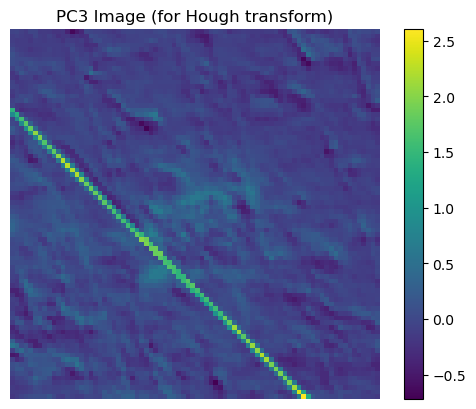

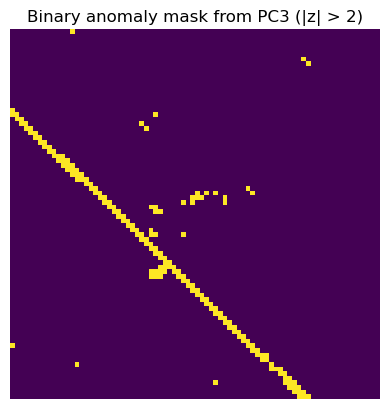

Detected line parameters (rho, theta):
rho=-12.00, theta=-0.7920 rad


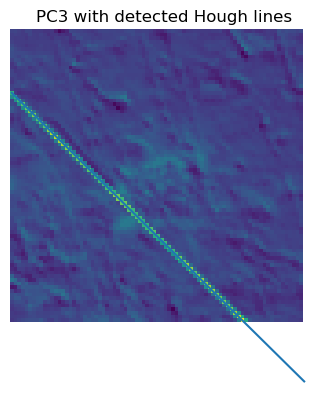

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Try importing scikit-image for Hough transform
try:
    from skimage.transform import hough_line, hough_line_peaks
    from skimage.feature import canny
    SKIMAGE_AVAILABLE = True
except ImportError as e:
    SKIMAGE_AVAILABLE = False
    print("scikit-image is not available, Hough transform with skimage cannot be used directly.", e)

# 1. Load data
csv_path = r"E:\refit\all_roi_spectra.csv"
df = pd.read_csv(csv_path)

# 2. Select spectral bands between start_band_name and end_band_name
start_band_name = "wave_1025.91nm"
end_band_name = "wave_1238.24nm"

cols = df.columns
start_idx = cols.get_loc(start_band_name)
end_idx = cols.get_loc(end_band_name)
band_cols = cols[start_idx:end_idx + 1]

spectra = df[band_cols].to_numpy(dtype=float)

# Mask invalid rows
nan_mask = np.isnan(spectra).any(axis=1)
valid_mask = ~nan_mask
spectra_valid = spectra[valid_mask]

# Fill NaNs with column means if any remain
col_means = np.nanmean(spectra_valid, axis=0)
inds = np.where(np.isnan(spectra_valid))
spectra_valid[inds] = np.take(col_means, inds[1])

# 3. PCA (reuse same parameters as before)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spectra_scaled = scaler.fit_transform(spectra_valid)

n_components = 5
pca = PCA(n_components=n_components)
scores = pca.fit_transform(spectra_scaled)

# Store PC3 scores in full vector
pc3_full = np.full((len(df),), np.nan)
pc3_full[valid_mask] = scores[:, 2]  # index 2 -> PC3

# 4. Reconstruct PC3 image using y, x as coordinates
rows = df["y"].values
cols_idx = df["x"].values

unique_rows_sorted = np.sort(np.unique(rows))
unique_cols_sorted = np.sort(np.unique(cols_idx))
row_to_idx = {v: i for i, v in enumerate(unique_rows_sorted)}
col_to_idx = {v: i for i, v in enumerate(unique_cols_sorted)}

n_rows = len(unique_rows_sorted)
n_cols = len(unique_cols_sorted)

pc3_img = np.full((n_rows, n_cols), np.nan)
for v, r, c in zip(pc3_full, rows, cols_idx):
    pc3_img[row_to_idx[r], col_to_idx[c]] = v

# 5. Show the PC3 image again
plt.figure()
plt.imshow(pc3_img)
plt.title("PC3 Image (for Hough transform)")
plt.colorbar()
plt.axis("off")
plt.show()

# 6. Preprocess for Hough: z-score + threshold to make a binary mask of anomalies
pc3_valid = pc3_img[~np.isnan(pc3_img)]
mean_pc3 = np.mean(pc3_valid)
std_pc3 = np.std(pc3_valid)

z_img = (pc3_img - mean_pc3) / std_pc3
# threshold on absolute z > 2.0 (heuristic)
binary_mask = np.zeros_like(z_img, dtype=bool)
binary_mask[np.abs(z_img) > 2.0] = True

# Plot the binary anomaly mask
plt.figure()
plt.imshow(binary_mask)
plt.title("Binary anomaly mask from PC3 (|z| > 2)")
plt.axis("off")
plt.show()

# 7. If scikit-image is available, run Hough transform on the binary mask
if SKIMAGE_AVAILABLE:
    # Convert boolean mask to float for edge detection
    # Use Canny on the mask edges (optional); here use mask directly as edges
    edges = binary_mask.astype(float)

    # Compute Hough transform
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
    hspace, angles, dists = hough_line(edges, theta=tested_angles)

    # Find prominent lines
    accum, angles_peaks, dists_peaks = hough_line_peaks(hspace, angles, dists, num_peaks=5)

    print("Detected line parameters (rho, theta):")
    for rho, theta in zip(dists_peaks, angles_peaks):
        print(f"rho={rho:.2f}, theta={theta:.4f} rad")

    # 8. Plot the detected lines over the PC3 image
    fig, ax = plt.subplots()
    ax.imshow(pc3_img)
    ax.set_title("PC3 with detected Hough lines")
    ax.axis("off")

    y_indices, x_indices = np.indices(pc3_img.shape)

    for rho, theta in zip(dists_peaks, angles_peaks):
        # x * cos(theta) + y * sin(theta) = rho
        # => y = (rho - x*cos(theta)) / sin(theta)  (if sin(theta) != 0)
        if np.abs(np.sin(theta)) > 1e-6:
            x_vals = np.array([0, pc3_img.shape[1]])
            y_vals = (rho - x_vals * np.cos(theta)) / np.sin(theta)
        else:
            # Vertical line: x = rho / cos(theta)
            x_vals = np.full(2, rho / np.cos(theta))
            y_vals = np.array([0, pc3_img.shape[0]])

        ax.plot(x_vals, y_vals)

    plt.show()
else:
    print("Hough transform visualization skipped because scikit-image is not installed.")a


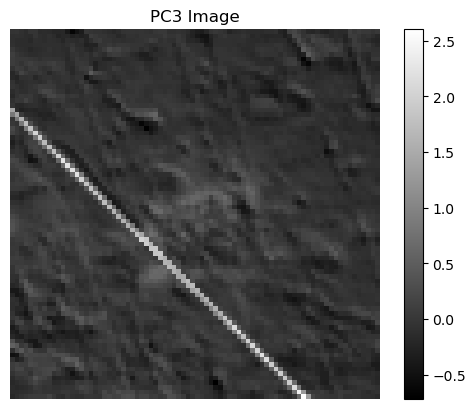

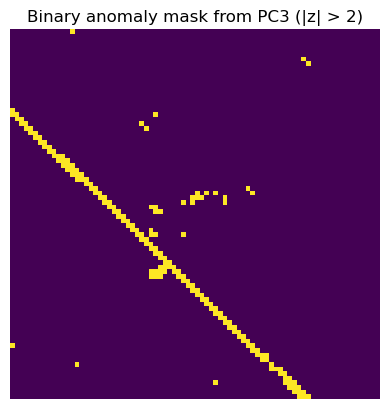

Detected line parameters (rho, theta):
rho=-12.00, theta=-0.7920 rad


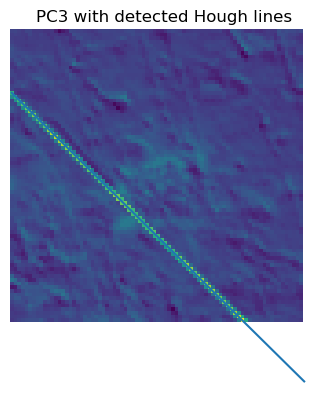

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Try importing scikit-image for Hough transform
try:
    from skimage.transform import hough_line, hough_line_peaks
    from skimage.feature import canny
    SKIMAGE_AVAILABLE = True
except ImportError as e:
    SKIMAGE_AVAILABLE = False
    print("scikit-image is not available, Hough transform with skimage cannot be used directly.", e)

# 1. Load data
csv_path = r"E:\refit\all_roi_spectra.csv"
df = pd.read_csv(csv_path)

# 2. Select spectral bands between start_band_name and end_band_name
start_band_name = "wave_1025.91nm"
end_band_name = "wave_1238.24nm"

cols = df.columns
start_idx = cols.get_loc(start_band_name)
end_idx = cols.get_loc(end_band_name)
band_cols = cols[start_idx:end_idx + 1]

spectra = df[band_cols].to_numpy(dtype=float)

# Mask invalid rows
nan_mask = np.isnan(spectra).any(axis=1)
valid_mask = ~nan_mask
spectra_valid = spectra[valid_mask]

# Fill NaNs with column means if any remain
col_means = np.nanmean(spectra_valid, axis=0)
inds = np.where(np.isnan(spectra_valid))
spectra_valid[inds] = np.take(col_means, inds[1])

# 3. PCA (reuse same parameters as before)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spectra_scaled = scaler.fit_transform(spectra_valid)

n_components = 5
pca = PCA(n_components=n_components)
scores = pca.fit_transform(spectra_scaled)

# Store PC3 scores in full vector
pc3_full = np.full((len(df),), np.nan)
pc3_full[valid_mask] = scores[:, 2]  # index 2 -> PC3

# 4. Reconstruct PC3 image using y, x as coordinates
rows = df["y"].values
cols_idx = df["x"].values

unique_rows_sorted = np.sort(np.unique(rows))
unique_cols_sorted = np.sort(np.unique(cols_idx))
row_to_idx = {v: i for i, v in enumerate(unique_rows_sorted)}
col_to_idx = {v: i for i, v in enumerate(unique_cols_sorted)}

n_rows = len(unique_rows_sorted)
n_cols = len(unique_cols_sorted)

pc3_img = np.full((n_rows, n_cols), np.nan)
for v, r, c in zip(pc3_full, rows, cols_idx):
    pc3_img[row_to_idx[r], col_to_idx[c]] = v

# 5. Show the PC3 image again
plt.figure()
plt.imshow(pc3_img,cmap="gray")
plt.title("PC3 Image")
plt.colorbar()
plt.axis("off")
plt.show()

# 6. Preprocess for Hough: z-score + threshold to make a binary mask of anomalies
pc3_valid = pc3_img[~np.isnan(pc3_img)]
mean_pc3 = np.mean(pc3_valid)
std_pc3 = np.std(pc3_valid)

z_img = (pc3_img - mean_pc3) / std_pc3
# threshold on absolute z > 2.0 (heuristic)
binary_mask = np.zeros_like(z_img, dtype=bool)
binary_mask[np.abs(z_img) > 2.0] = True

# Plot the binary anomaly mask
plt.figure()
plt.imshow(binary_mask)
plt.title("Binary anomaly mask from PC3 (|z| > 2)")
plt.axis("off")
plt.show()

# 7. If scikit-image is available, run Hough transform on the binary mask
if SKIMAGE_AVAILABLE:
    # Convert boolean mask to float for edge detection
    # Use Canny on the mask edges (optional); here use mask directly as edges
    edges = binary_mask.astype(float)

    # Compute Hough transform
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
    hspace, angles, dists = hough_line(edges, theta=tested_angles)

    # Find prominent lines
    accum, angles_peaks, dists_peaks = hough_line_peaks(hspace, angles, dists, num_peaks=5)

    print("Detected line parameters (rho, theta):")
    for rho, theta in zip(dists_peaks, angles_peaks):
        print(f"rho={rho:.2f}, theta={theta:.4f} rad")

    # 8. Plot the detected lines over the PC3 image
    fig, ax = plt.subplots()
    ax.imshow(pc3_img)
    ax.set_title("PC3 with detected Hough lines")
    ax.axis("off")

    y_indices, x_indices = np.indices(pc3_img.shape)

    for rho, theta in zip(dists_peaks, angles_peaks):
        # x * cos(theta) + y * sin(theta) = rho
        # => y = (rho - x*cos(theta)) / sin(theta)  (if sin(theta) != 0)
        if np.abs(np.sin(theta)) > 1e-6:
            x_vals = np.array([0, pc3_img.shape[1]])
            y_vals = (rho - x_vals * np.cos(theta)) / np.sin(theta)
        else:
            # Vertical line: x = rho / cos(theta)
            x_vals = np.full(2, rho / np.cos(theta))
            y_vals = np.array([0, pc3_img.shape[0]])

        ax.plot(x_vals, y_vals)

    plt.show()
else:
    print("Hough transform visualization skipped because scikit-image is not installed.")
